**Building ML Models with Real-world Teleco Data -- The Model Scores aren't so Perfect Afterall**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading in the data
df = pd.read_excel("ChurnData.xlsx")
df.head()

,Customer ID,Country,Region,Channel,Partner,Days on Network,Network Availability,Device Make,Churn
0,ZAR01,South Africa,Northern Cape,Regional,Awesim,7,Yes,Apple,No
1,ZAR02,South Africa,North West,Retail,Awesim,110,Yes,OnePlus,Yes
2,ZAR03,South Africa,KwaZulu-Natal,Direct,PEP,231,No,Xiaomi,Yes
3,ZAR04,South Africa,KwaZulu-Natal,Retail,PEP,255,No,Xiaomi,Yes
4,ZAR05,South Africa,Gauteng,Strategic,ERZ,133,No,OnePlus,Yes


In [3]:
# Dropping unnescessary features
df.drop(["Customer ID", "Country"], axis = "columns", inplace = True)
df

,Region,Channel,Partner,Days on Network,Network Availability,Device Make,Churn
0,Northern Cape,Regional,Awesim,7,Yes,Apple,No
1,North West,Retail,Awesim,110,Yes,OnePlus,Yes
2,KwaZulu-Natal,Direct,PEP,231,No,Xiaomi,Yes
3,KwaZulu-Natal,Retail,PEP,255,No,Xiaomi,Yes
4,Gauteng,Strategic,ERZ,133,No,OnePlus,Yes
...,...,...,...,...,...,...,...
99,Free State,Direct,TSPC,218,No,LG,No
100,North West,Strategic,TSPC,10,Yes,Xiaomi,Yes
101,Mpumalanga,Retail,ERZ,176,No,HTC,No
102,North West,Direct,Awesim,205,Yes,HTC,No


In [4]:
# Encoding the data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [5]:
df["Region"] = le.fit_transform(df["Region"])
df["Channel"] = le.fit_transform(df["Channel"])
df["Partner"] = le.fit_transform(df["Partner"])
df["Network Availability"] = le.fit_transform(df["Network Availability"])
df["Device Make"] = le.fit_transform(df["Device Make"])
df["Churn"] = le.fit_transform(df["Churn"])

In [6]:
# Ensuring we have correct data types
df.dtypes

Region                  int64
Channel                 int64
Partner                 int64
Days on Network         int64
Network Availability    int64
Device Make             int64
Churn                   int64
dtype: object

In [7]:
df["Region"] = df["Region"].astype("category")
df["Channel"] = df["Channel"].astype("category")
df["Partner"] = df["Partner"].astype("category")
df["Network Availability"] = df["Network Availability"].astype("category")
df["Device Make"] = df["Device Make"].astype("category")
df["Churn"] = df["Churn"].astype("category")

df.dtypes

Region                  category
Channel                 category
Partner                 category
Days on Network            int64
Network Availability    category
Device Make             category
Churn                   category
dtype: object

In [8]:
# Training the model

from sklearn.model_selection import train_test_split

X = df[["Region", "Channel", "Partner", "Days on Network", "Network Availability", "Device Make"]]
y = df[["Churn"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
# Model packages
from sklearn.linear_model import LogisticRegression # For logistic regression
from sklearn.ensemble import RandomForestClassifier # For random forest classification
from sklearn.naive_bayes import GaussianNB # For naive Bayes

In [10]:
# 1. Logistic regression model

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3333333333333333

Text(69.0, 0.5, 'True')

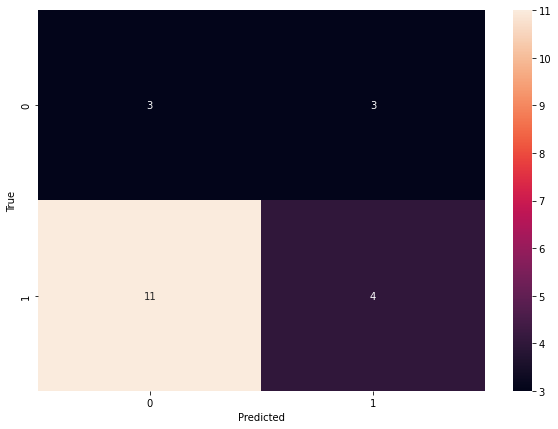

In [11]:
# Predicting values

y_predicted1 = lr_model.predict(X_test)

# Creating a confusion matrix for logistic regression
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_predicted1)

import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm1, annot = True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [12]:
# 2. Random forest model

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.19047619047619047

Text(69.0, 0.5, 'True')

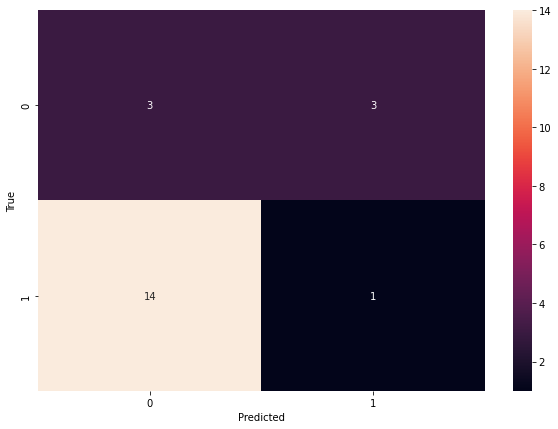

In [13]:
# Predicting values

y_predicted2 = rf_model.predict(X_test)

# Creating a confusion matrix for logistic regression
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_predicted2)

import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm2, annot = True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [14]:
# 3. Naive Bayes model

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_classifier.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.38095238095238093

Text(69.0, 0.5, 'True')

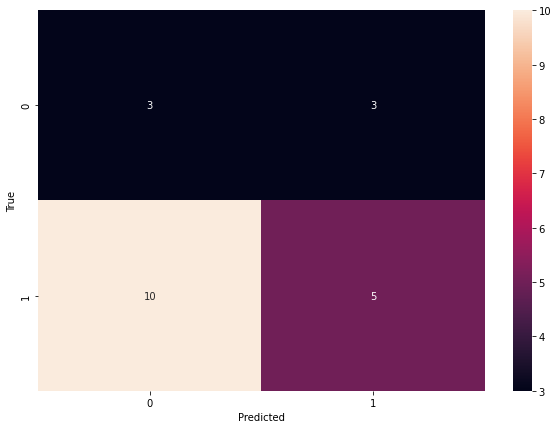

In [15]:
# Predicting values

y_predicted3 = nb_classifier.predict(X_test)

# Creating a confusion matrix for logistic regression
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_test, y_predicted3)

import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm3, annot = True)
plt.xlabel("Predicted")
plt.ylabel("True")